In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Clustering de voitures

Nous souhaitons diviser des voitures en plusieurs groupes. Commençons par regarder les données : 

In [2]:
import pandas as pd

data = pd.read_excel("voitures_clustering.xlsx")
data

,Modele,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,C02
0,PANDA,54,1108,150,354,159,154,860,135
1,TWINGO,60,1149,151,344,163,143,840,143
2,YARIS,65,998,155,364,166,150,880,134
3,CITRONC2,61,1124,158,367,166,147,932,141
4,CORSA,70,1248,165,384,165,144,1035,127
5,FIESTA,68,1399,164,392,168,144,1138,117
6,CLIO,100,1461,185,382,164,142,980,113
7,P1007,75,1360,165,374,169,161,1181,153
8,MODUS,113,1598,188,380,170,159,1170,163
9,MUSA,100,1910,179,399,170,169,1275,146


L'histogramme de chaque paramètre donne des indications sur sa répartition :

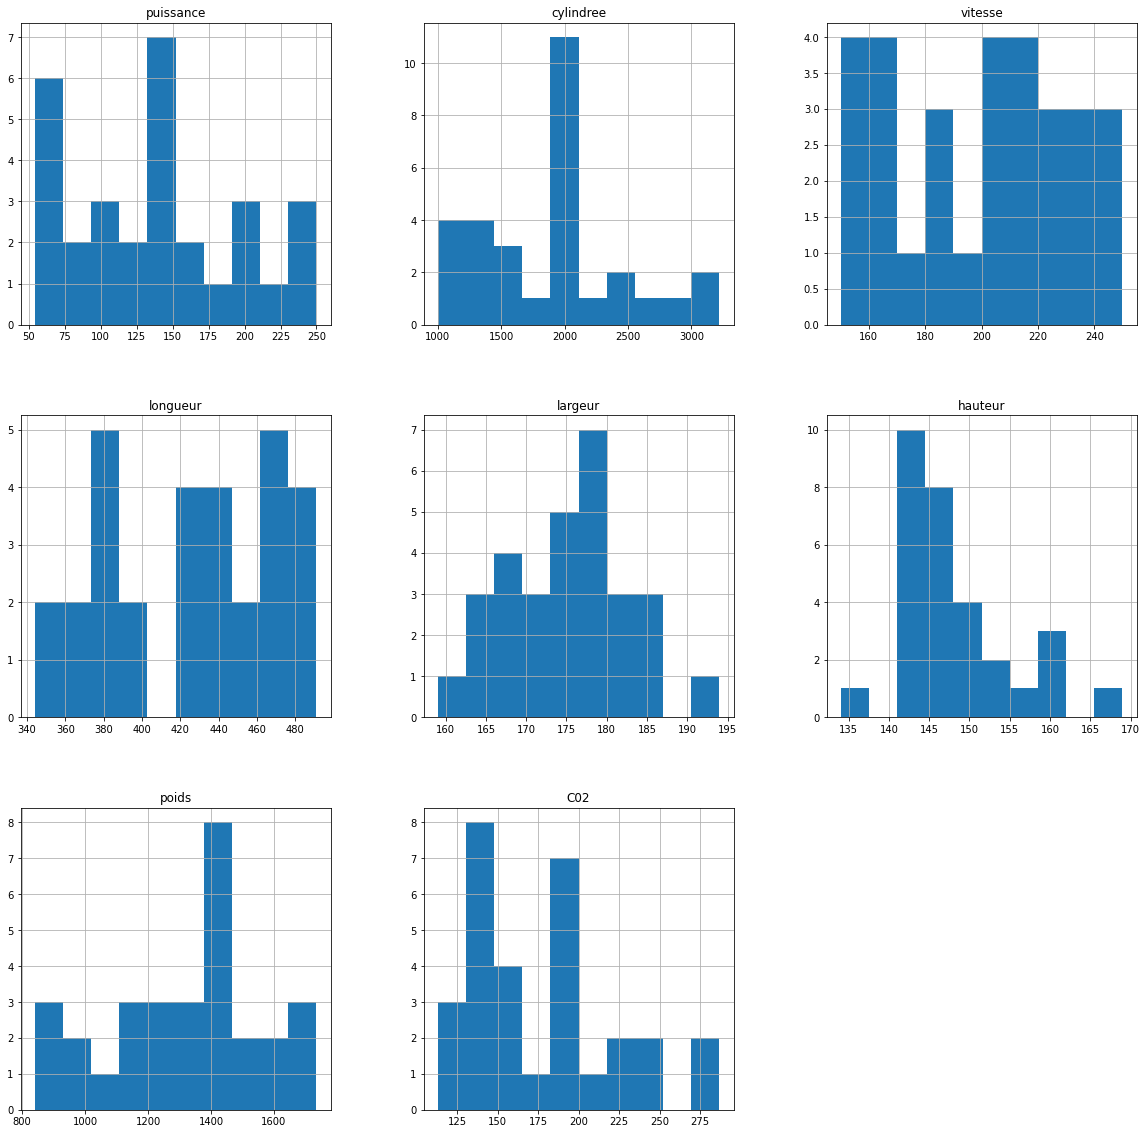

In [3]:
data.hist(bins=10, figsize=(20, 20));

Pour utiliser un algorithme de machine learning, il est toujours conseillé de standardiser les données.

In [33]:
from sklearn import preprocessing

data_scaled = preprocessing.scale(data.iloc[:, 1:])  # standardisation

In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data2d = pd.DataFrame(pca.fit_transform(data_scaled), index=data["Modele"], columns=["x", "y"])
pca.explained_variance_ratio_ # variance expliquée par les deux axes principaux

array([0.70547537, 0.13780777])

In [58]:
pd.DataFrame(pca.components_, index=["x", "y"], columns=data.columns[1:])  # coordonnées des deux axes principaux

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,C02
x,-0.393466,-0.364012,-0.400973,-0.386224,-0.348839,0.120983,-0.384690,-0.344120
y,-0.099743,0.240731,-0.113762,0.060612,0.153163,0.868122,0.282546,-0.241984


On voit que l'axe x discrimine les grosses voitures : plus cette valeur est petite, plus la voiture correspondante est puissante, rapide, large, polluante... Étonnamment, la hauteur rentre peu en compte sur cet axe et est même inversement proportionnelle aux autre coordonnées.  
L'axe y discrimine les voitures selon leur hauteur principalement.  
Il y a donc 2 informations particulièrement importantes : la largeur générale de la voiture et sa hauteur.  

In [79]:
import plotly.express as px
fig = px.scatter(x=data2d.iloc[:, 0], y=data2d.iloc[:, 1], text=data2d.index)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=600,
    width=1200,
    title_text='Données suivant les deux composantes principales du PCA'
)
fig.show()

Puisque nous ne connaissons pas à l'avance les labels/groupes, nous allons utiliser un algorithme de clustering. L'un des plus connus est K-Means.  
Comme le nombre de clusters $k$ est inconnu, nous allons appliquer l'algorithme K-Means (en fait K-Means++, qui )

In [49]:
silhouette_score

NameError: name 'silhouette_score' is not defined

In [63]:
def kmeans_multiple(data, k, n):
    km_best = KMeans(n_clusters=k).fit(data)
    for _ in range(n - 1):
        km = KMeans(n_clusters=k).fit(data)
        if km.inertia_ < km_best.inertia_:
            km_best = km
    return km_best

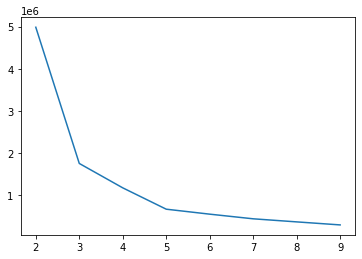

In [73]:
from sklearn.cluster import KMeans

X, Y = [], []
for k in range(2, 10):
    km = kmeans_multiple(data.iloc[:, 1:], k, 20)
    Y.append(km.inertia_)
    X.append(k)
plt.plot(X, Y);

In [92]:
km = kmeans_multiple(data.iloc[:, 1:], 3, 20)

In [93]:
import plotly.express as px
fig = px.scatter(x=data2d.iloc[:, 0], y=data2d.iloc[:, 1], text=data2d.index, color=list(map(str, km.labels_)))
fig.update_traces(marker=dict(size=12), textposition='top center')
fig.update_layout(height=600, width=1200, title_text='Données suivant les deux composantes principales du PCA')
fig.show()


In [99]:
from sklearn.linear_model import LogisticRegression

dt = data.iloc[:, 1:]

for i in range(km.n_clusters):
    t = np.where(km.labels_ == i)[0]
    y = np.zeros((len(data.index)))
    y[t] = 1
    lr = LogisticRegression(max_iter = 4000).fit(dt, y)
    print(pd.DataFrame(np.array([np.mean(data.loc[t]), lr.coef_[0]]).T, index = dt.columns, columns = ["Moyenne", "Coeffs"]))

AttributeError: 'DataFrame' object has no attribute 'DataFrame'